In [1]:
# ! rm -r /kaggle/working/
! cp -r /kaggle/input/erav1-s18-unet/UNet /kaggle/working/

In [2]:
! cd /kaggle/working/UNet
! ls

UNet


In [4]:
from src.dataset import OxfordIIITPetDatamodule
from src.model import UNet
import pytorch_lightning as pl
from pytorch_lightning.callbacks import LearningRateMonitor

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
datamodule = OxfordIIITPetDatamodule(
    train_file="./data/trainval.txt",
    val_file="./data/test.txt",
    images_dir='/kaggle/input/the-oxfordiiit-pet-dataset/images', 
    masks_dir='/kaggle/input/the-oxfordiiit-pet-dataset/annotations/trimaps',
    batch_size=32)

In [6]:
datamodule.prepare_data()

Training images: 3678
Validation images: 3668


In [7]:
model = UNet(
    max_filter_size=512,
    reduction_method="max_pool",
    expansion_method="strided_conv_transpose",
    loss_fn="cross_entropy"
            )

In [8]:
trainer = pl.Trainer(
    max_epochs=25,
    callbacks=[LearningRateMonitor(logging_interval='step', log_momentum=True)],
    check_val_every_n_epoch=3,
)

In [9]:
trainer.fit(model, datamodule)

Training images: 3678
Validation images: 3668


Sanity Checking: 0it [00:00, ?it/s]

Epoch: 0 Val Loss: 1.179675817489624 Val Acc: 12.498833656311035


Training: 0it [00:00, ?it/s]

Epoch: 0 Train Loss: 0.8306878805160522
Epoch: 1 Train Loss: 0.597893476486206


Validation: 0it [00:00, ?it/s]

Epoch: 2 Val Loss: 0.5744744539260864 Val Acc: 77.8749008178711
Epoch: 2 Train Loss: 0.5073330998420715
Epoch: 3 Train Loss: 0.4524690806865692
Epoch: 4 Train Loss: 0.4075634479522705


Validation: 0it [00:00, ?it/s]

Epoch: 5 Val Loss: 0.4056272804737091 Val Acc: 84.2718734741211
Epoch: 5 Train Loss: 0.384540855884552
Epoch: 6 Train Loss: 0.36259725689888
Epoch: 7 Train Loss: 0.3417808711528778


Validation: 0it [00:00, ?it/s]

Epoch: 8 Val Loss: 0.32093146443367004 Val Acc: 87.773193359375
Epoch: 8 Train Loss: 0.3192879259586334
Epoch: 9 Train Loss: 0.3057677745819092
Epoch: 10 Train Loss: 0.2887307107448578


Validation: 0it [00:00, ?it/s]

Epoch: 11 Val Loss: 0.307982474565506 Val Acc: 88.30055236816406
Epoch: 11 Train Loss: 0.2743414342403412
Epoch: 12 Train Loss: 0.2629954218864441
Epoch: 13 Train Loss: 0.24932684004306793


Validation: 0it [00:00, ?it/s]

Epoch: 14 Val Loss: 0.3291657269001007 Val Acc: 88.20415496826172
Epoch: 14 Train Loss: 0.23331700265407562
Epoch: 15 Train Loss: 0.22353851795196533
Epoch: 16 Train Loss: 0.21607789397239685


Validation: 0it [00:00, ?it/s]

Epoch: 17 Val Loss: 0.2900831699371338 Val Acc: 89.47633361816406
Epoch: 17 Train Loss: 0.20603059232234955
Epoch: 18 Train Loss: 0.18619702756404877
Epoch: 19 Train Loss: 0.1853335052728653


Validation: 0it [00:00, ?it/s]

Epoch: 20 Val Loss: 0.3067881464958191 Val Acc: 89.49679565429688
Epoch: 20 Train Loss: 0.1756240874528885
Epoch: 21 Train Loss: 0.18213693797588348
Epoch: 22 Train Loss: 0.16232074797153473


Validation: 0it [00:00, ?it/s]

Epoch: 23 Val Loss: 0.3301961421966553 Val Acc: 89.82954406738281
Epoch: 23 Train Loss: 0.15735536813735962
Epoch: 24 Train Loss: 0.14880040287971497


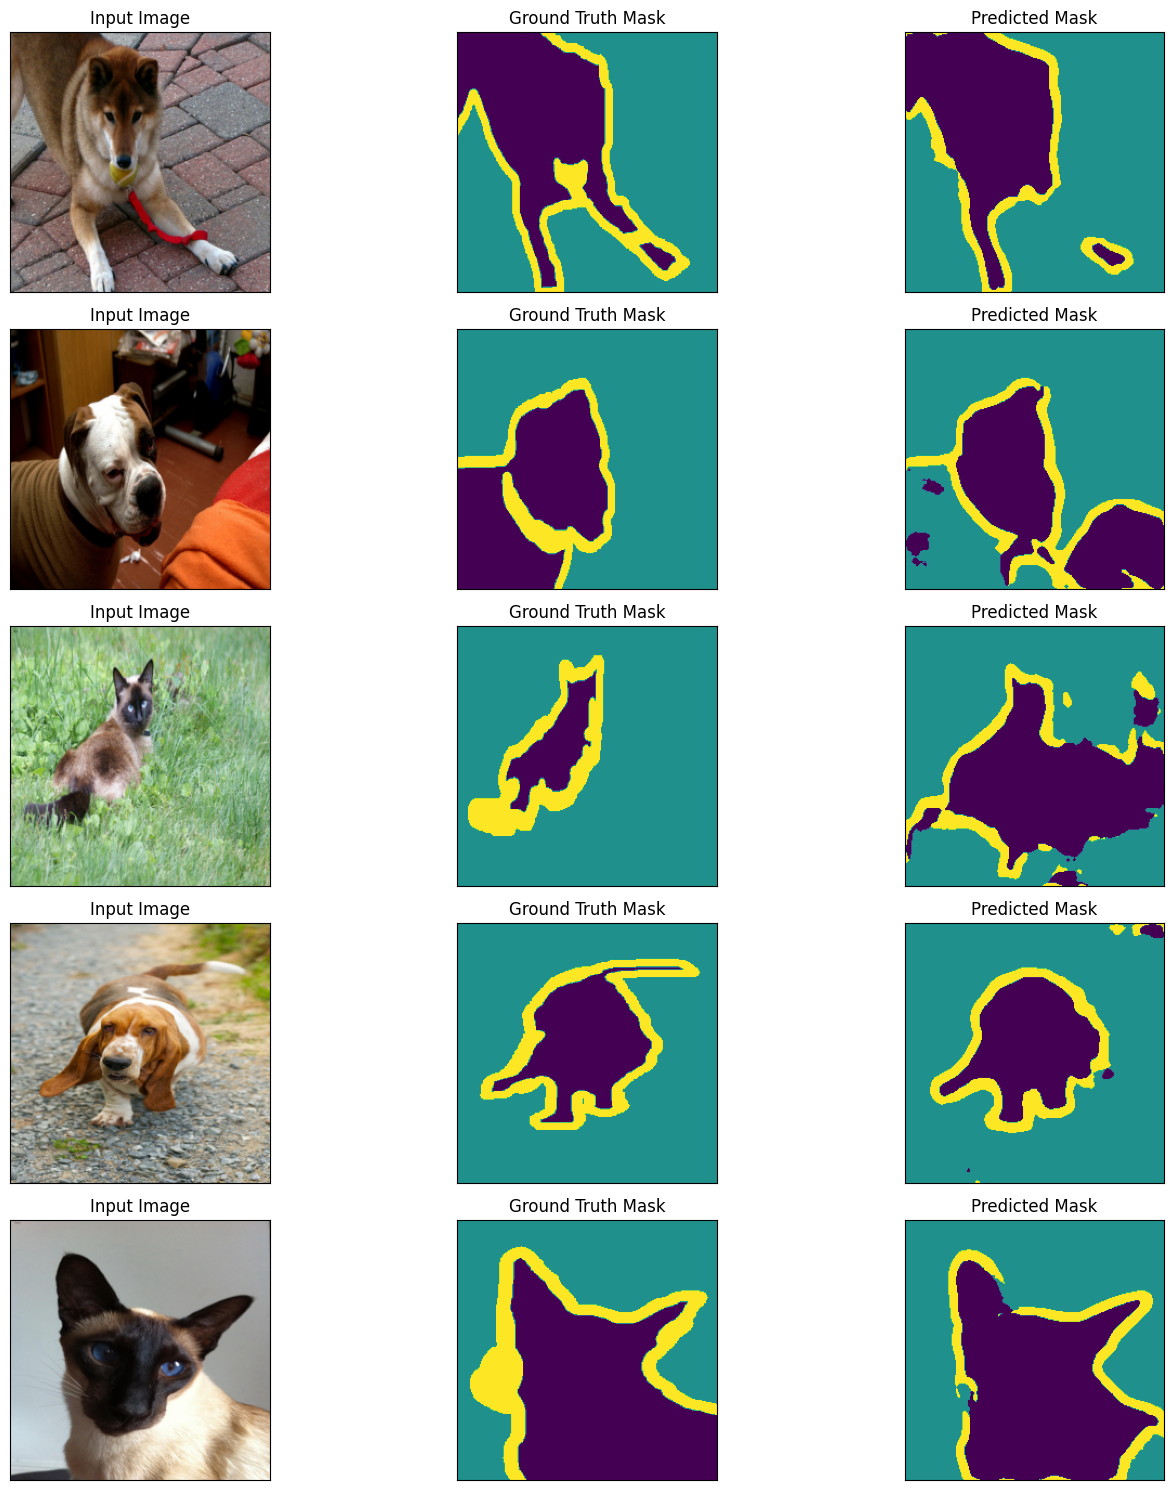

In [10]:
model.cpu().plot_random_test_samples(num_samples=5)

In [11]:
model = UNet(
    max_filter_size=512,
    reduction_method="max_pool",
    expansion_method="strided_conv_transpose",
    loss_fn="dice"
            )

In [12]:
trainer = pl.Trainer(
    max_epochs=25,
    callbacks=[LearningRateMonitor(logging_interval='step', log_momentum=True)],
    check_val_every_n_epoch=3,
)

In [13]:
trainer.fit(model, datamodule)

Training images: 3678
Validation images: 3668


Sanity Checking: 0it [00:00, ?it/s]

Epoch: 0 Val Loss: 0.7096074819564819 Val Acc: 12.498833656311035


Training: 0it [00:00, ?it/s]

Epoch: 0 Train Loss: 0.33145853877067566
Epoch: 1 Train Loss: 0.1744322031736374


Validation: 0it [00:00, ?it/s]

Epoch: 2 Val Loss: 0.15653860569000244 Val Acc: 75.5447998046875
Epoch: 2 Train Loss: 0.1523459553718567
Epoch: 3 Train Loss: 0.13758207857608795
Epoch: 4 Train Loss: 0.12226595729589462


Validation: 0it [00:00, ?it/s]

Epoch: 5 Val Loss: 0.11124944686889648 Val Acc: 81.2480697631836
Epoch: 5 Train Loss: 0.11436787992715836
Epoch: 6 Train Loss: 0.10423745959997177
Epoch: 7 Train Loss: 0.0968913659453392


Validation: 0it [00:00, ?it/s]

Epoch: 8 Val Loss: 0.098973348736763 Val Acc: 82.93392181396484
Epoch: 8 Train Loss: 0.09300781041383743
Epoch: 9 Train Loss: 0.08936839550733566
Epoch: 10 Train Loss: 0.08411592245101929


Validation: 0it [00:00, ?it/s]

Epoch: 11 Val Loss: 0.0913485512137413 Val Acc: 84.06571960449219
Epoch: 11 Train Loss: 0.08233247697353363
Epoch: 12 Train Loss: 0.07911409437656403
Epoch: 13 Train Loss: 0.07504907250404358


Validation: 0it [00:00, ?it/s]

Epoch: 14 Val Loss: 0.08004963397979736 Val Acc: 85.80321502685547
Epoch: 14 Train Loss: 0.07358594238758087
Epoch: 15 Train Loss: 0.07021311670541763
Epoch: 16 Train Loss: 0.06964249908924103


Validation: 0it [00:00, ?it/s]

Epoch: 17 Val Loss: 0.06521826237440109 Val Acc: 88.19266510009766
Epoch: 17 Train Loss: 0.06752192229032516
Epoch: 18 Train Loss: 0.06368961185216904
Epoch: 19 Train Loss: 0.06379495561122894


Validation: 0it [00:00, ?it/s]

Epoch: 20 Val Loss: 0.07198495417833328 Val Acc: 87.07301330566406
Epoch: 20 Train Loss: 0.06029398739337921
Epoch: 21 Train Loss: 0.05885959044098854
Epoch: 22 Train Loss: 0.057634152472019196


Validation: 0it [00:00, ?it/s]

Epoch: 23 Val Loss: 0.06657882779836655 Val Acc: 87.94912719726562
Epoch: 23 Train Loss: 0.05624917522072792
Epoch: 24 Train Loss: 0.05508378520607948


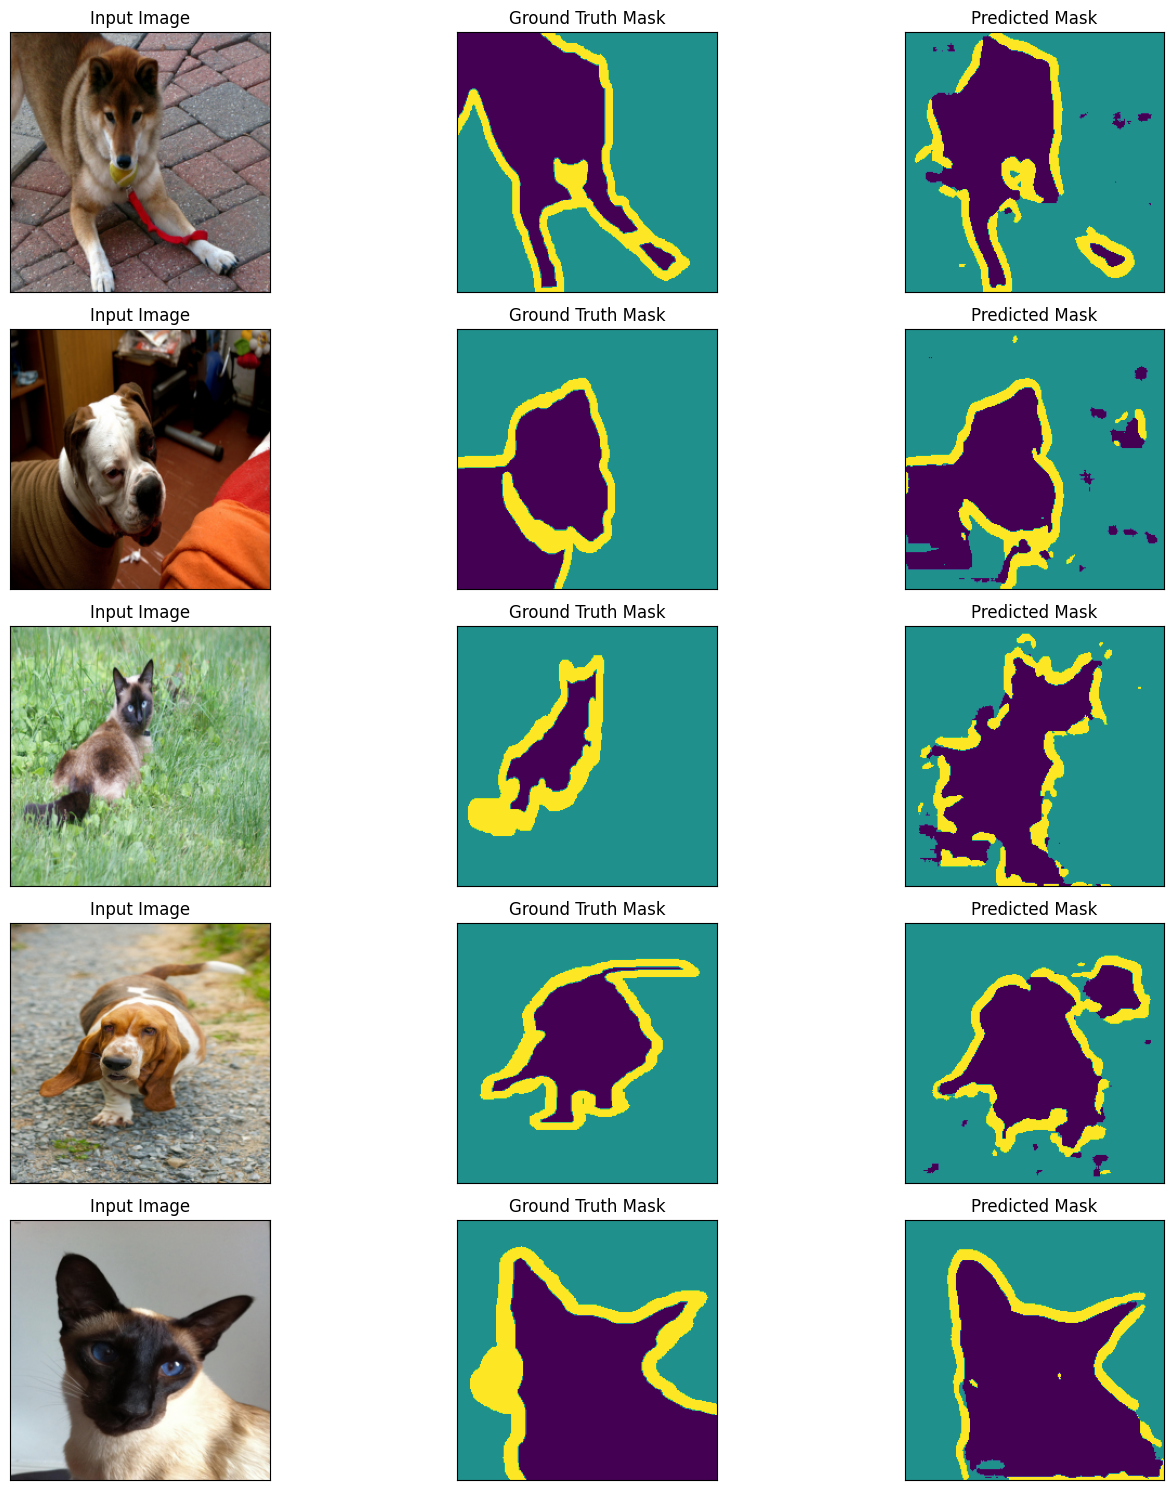

In [14]:
model.cpu().plot_random_test_samples(num_samples=5)

In [15]:
model = UNet(
    max_filter_size=512,
    reduction_method="strided_conv",
    expansion_method="strided_conv_transpose",
    loss_fn="cross_entropy"
            )

In [16]:
trainer = pl.Trainer(
    max_epochs=25,
    callbacks=[LearningRateMonitor(logging_interval='step', log_momentum=True)],
    check_val_every_n_epoch=3,
)

In [17]:
trainer.fit(model, datamodule)

Training images: 3678
Validation images: 3668


Sanity Checking: 0it [00:00, ?it/s]

Epoch: 0 Val Loss: 1.1997994184494019 Val Acc: 12.498833656311035


Training: 0it [00:00, ?it/s]

Epoch: 0 Train Loss: 0.8962104916572571
Epoch: 1 Train Loss: 0.6238833069801331


Validation: 0it [00:00, ?it/s]

Epoch: 2 Val Loss: 0.5115466117858887 Val Acc: 80.27688598632812
Epoch: 2 Train Loss: 0.5430590510368347
Epoch: 3 Train Loss: 0.48098093271255493
Epoch: 4 Train Loss: 0.44626227021217346


Validation: 0it [00:00, ?it/s]

Epoch: 5 Val Loss: 0.45792171359062195 Val Acc: 83.11744689941406
Epoch: 5 Train Loss: 0.4134145677089691
Epoch: 6 Train Loss: 0.38811060786247253
Epoch: 7 Train Loss: 0.36454203724861145


Validation: 0it [00:00, ?it/s]

Epoch: 8 Val Loss: 0.3761388063430786 Val Acc: 85.2835922241211
Epoch: 8 Train Loss: 0.3460181653499603
Epoch: 9 Train Loss: 0.3343285024166107
Epoch: 10 Train Loss: 0.3220423460006714


Validation: 0it [00:00, ?it/s]

Epoch: 11 Val Loss: 0.3617185056209564 Val Acc: 86.01924896240234
Epoch: 11 Train Loss: 0.3063885569572449
Epoch: 12 Train Loss: 0.29935723543167114
Epoch: 13 Train Loss: 0.2869071662425995


Validation: 0it [00:00, ?it/s]

Epoch: 14 Val Loss: 0.3165832757949829 Val Acc: 88.05522155761719
Epoch: 14 Train Loss: 0.2716982066631317
Epoch: 15 Train Loss: 0.25973889231681824
Epoch: 16 Train Loss: 0.2542218267917633


Validation: 0it [00:00, ?it/s]

Epoch: 17 Val Loss: 0.3019222915172577 Val Acc: 88.89576721191406
Epoch: 17 Train Loss: 0.24040843546390533
Epoch: 18 Train Loss: 0.23071008920669556
Epoch: 19 Train Loss: 0.22028787434101105


Validation: 0it [00:00, ?it/s]

Epoch: 20 Val Loss: 0.30365219712257385 Val Acc: 89.21812438964844
Epoch: 20 Train Loss: 0.21203015744686127
Epoch: 21 Train Loss: 0.1996053010225296
Epoch: 22 Train Loss: 0.19198685884475708


Validation: 0it [00:00, ?it/s]

Epoch: 23 Val Loss: 0.3544604480266571 Val Acc: 88.48428344726562
Epoch: 23 Train Loss: 0.19051334261894226
Epoch: 24 Train Loss: 0.18503428995609283


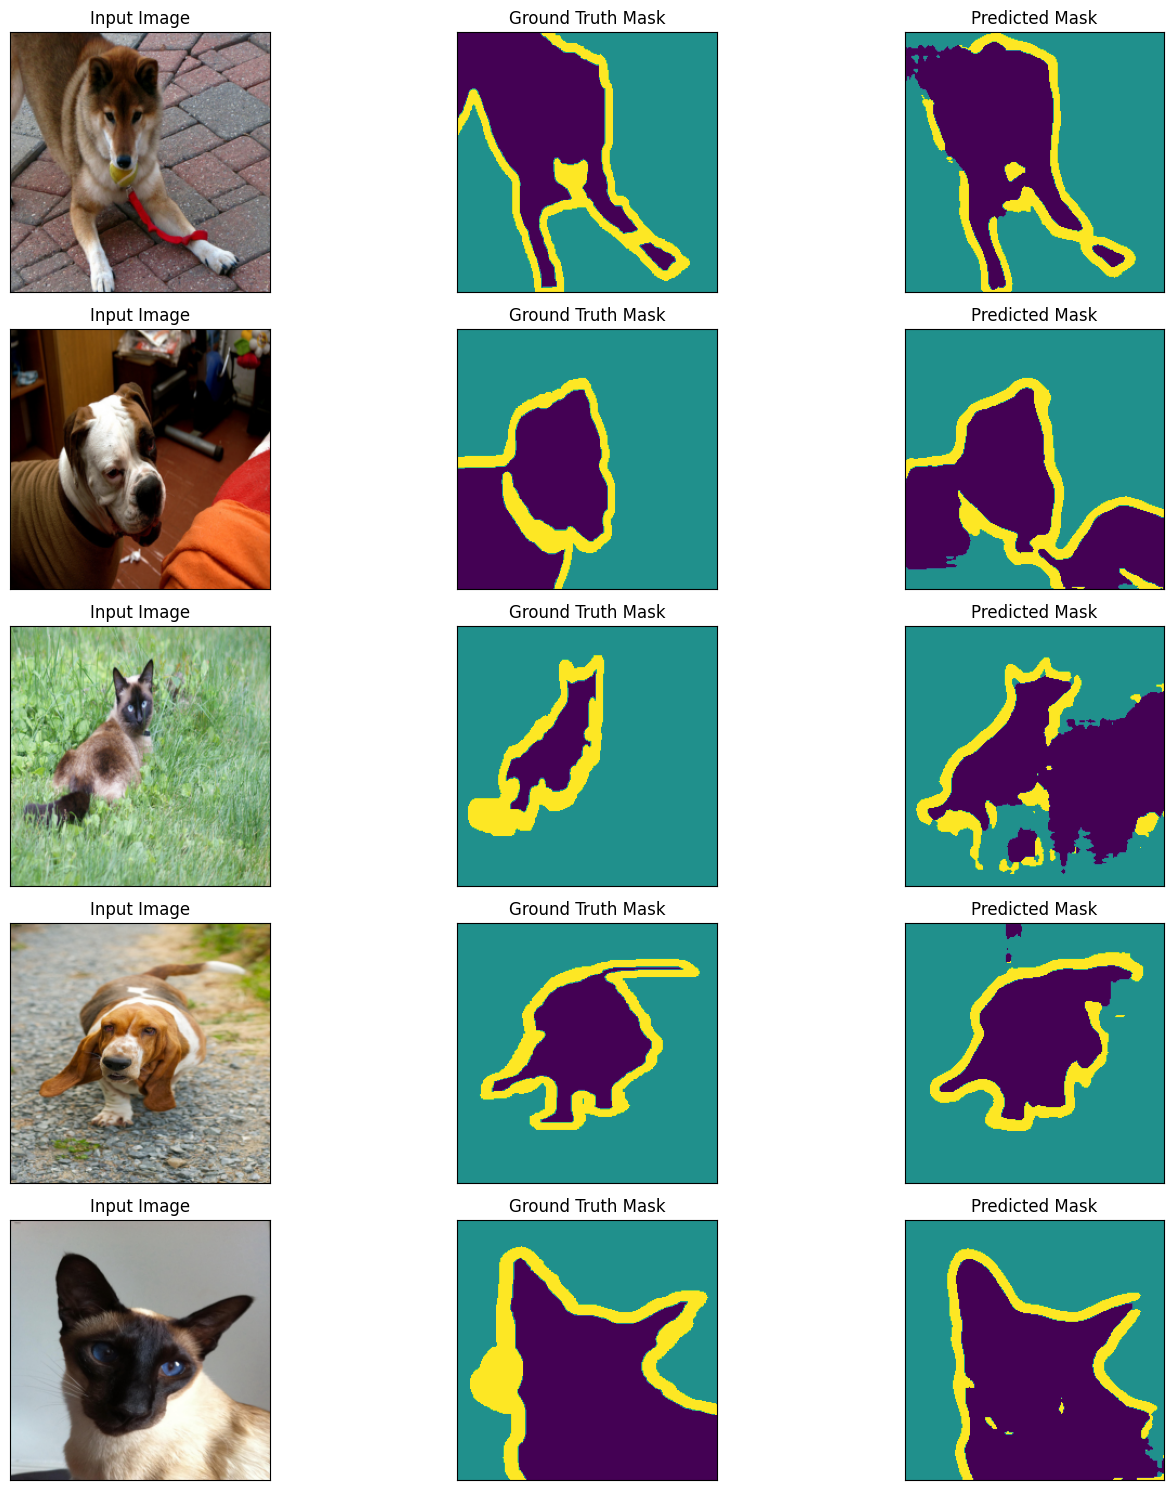

In [18]:
model.cpu().plot_random_test_samples(num_samples=5)

In [19]:
model = UNet(
    max_filter_size=512,
    reduction_method="strided_conv",
    expansion_method="upsample",
    loss_fn="dice"
            )

In [20]:
trainer = pl.Trainer(
    max_epochs=25,
    callbacks=[LearningRateMonitor(logging_interval='step', log_momentum=True)],
    check_val_every_n_epoch=3,
)

In [21]:
trainer.fit(model, datamodule)

Training images: 3678
Validation images: 3668


Sanity Checking: 0it [00:00, ?it/s]

Epoch: 0 Val Loss: 0.7200710773468018 Val Acc: 29.83469009399414


Training: 0it [00:00, ?it/s]

Epoch: 0 Train Loss: 0.3301943242549896
Epoch: 1 Train Loss: 0.18604299426078796


Validation: 0it [00:00, ?it/s]

Epoch: 2 Val Loss: 0.15025968849658966 Val Acc: 76.30842590332031
Epoch: 2 Train Loss: 0.16059023141860962
Epoch: 3 Train Loss: 0.137208953499794
Epoch: 4 Train Loss: 0.12346073985099792


Validation: 0it [00:00, ?it/s]

Epoch: 5 Val Loss: 0.11621246486902237 Val Acc: 80.50772857666016
Epoch: 5 Train Loss: 0.11362946033477783
Epoch: 6 Train Loss: 0.10611070692539215
Epoch: 7 Train Loss: 0.10003624111413956


Validation: 0it [00:00, ?it/s]

Epoch: 8 Val Loss: 0.10172829777002335 Val Acc: 82.51773071289062
Epoch: 8 Train Loss: 0.09691111743450165
Epoch: 9 Train Loss: 0.08993280678987503
Epoch: 10 Train Loss: 0.08446056395769119


Validation: 0it [00:00, ?it/s]

Epoch: 11 Val Loss: 0.08764686435461044 Val Acc: 84.63055419921875
Epoch: 11 Train Loss: 0.08226805925369263
Epoch: 12 Train Loss: 0.0790192112326622
Epoch: 13 Train Loss: 0.07565093040466309


Validation: 0it [00:00, ?it/s]

Epoch: 14 Val Loss: 0.0777033194899559 Val Acc: 86.1636734008789
Epoch: 14 Train Loss: 0.0740232989192009
Epoch: 15 Train Loss: 0.0716261938214302
Epoch: 16 Train Loss: 0.06921761482954025


Validation: 0it [00:00, ?it/s]

Epoch: 17 Val Loss: 0.07212706655263901 Val Acc: 87.05619049072266
Epoch: 17 Train Loss: 0.06938473135232925
Epoch: 18 Train Loss: 0.06553475558757782
Epoch: 19 Train Loss: 0.06496084481477737


Validation: 0it [00:00, ?it/s]

Epoch: 20 Val Loss: 0.0732763260602951 Val Acc: 86.86787414550781
Epoch: 20 Train Loss: 0.06365954130887985
Epoch: 21 Train Loss: 0.06165996566414833
Epoch: 22 Train Loss: 0.06101655960083008


Validation: 0it [00:00, ?it/s]

Epoch: 23 Val Loss: 0.0724077969789505 Val Acc: 86.99848937988281
Epoch: 23 Train Loss: 0.059223998337984085
Epoch: 24 Train Loss: 0.058406345546245575


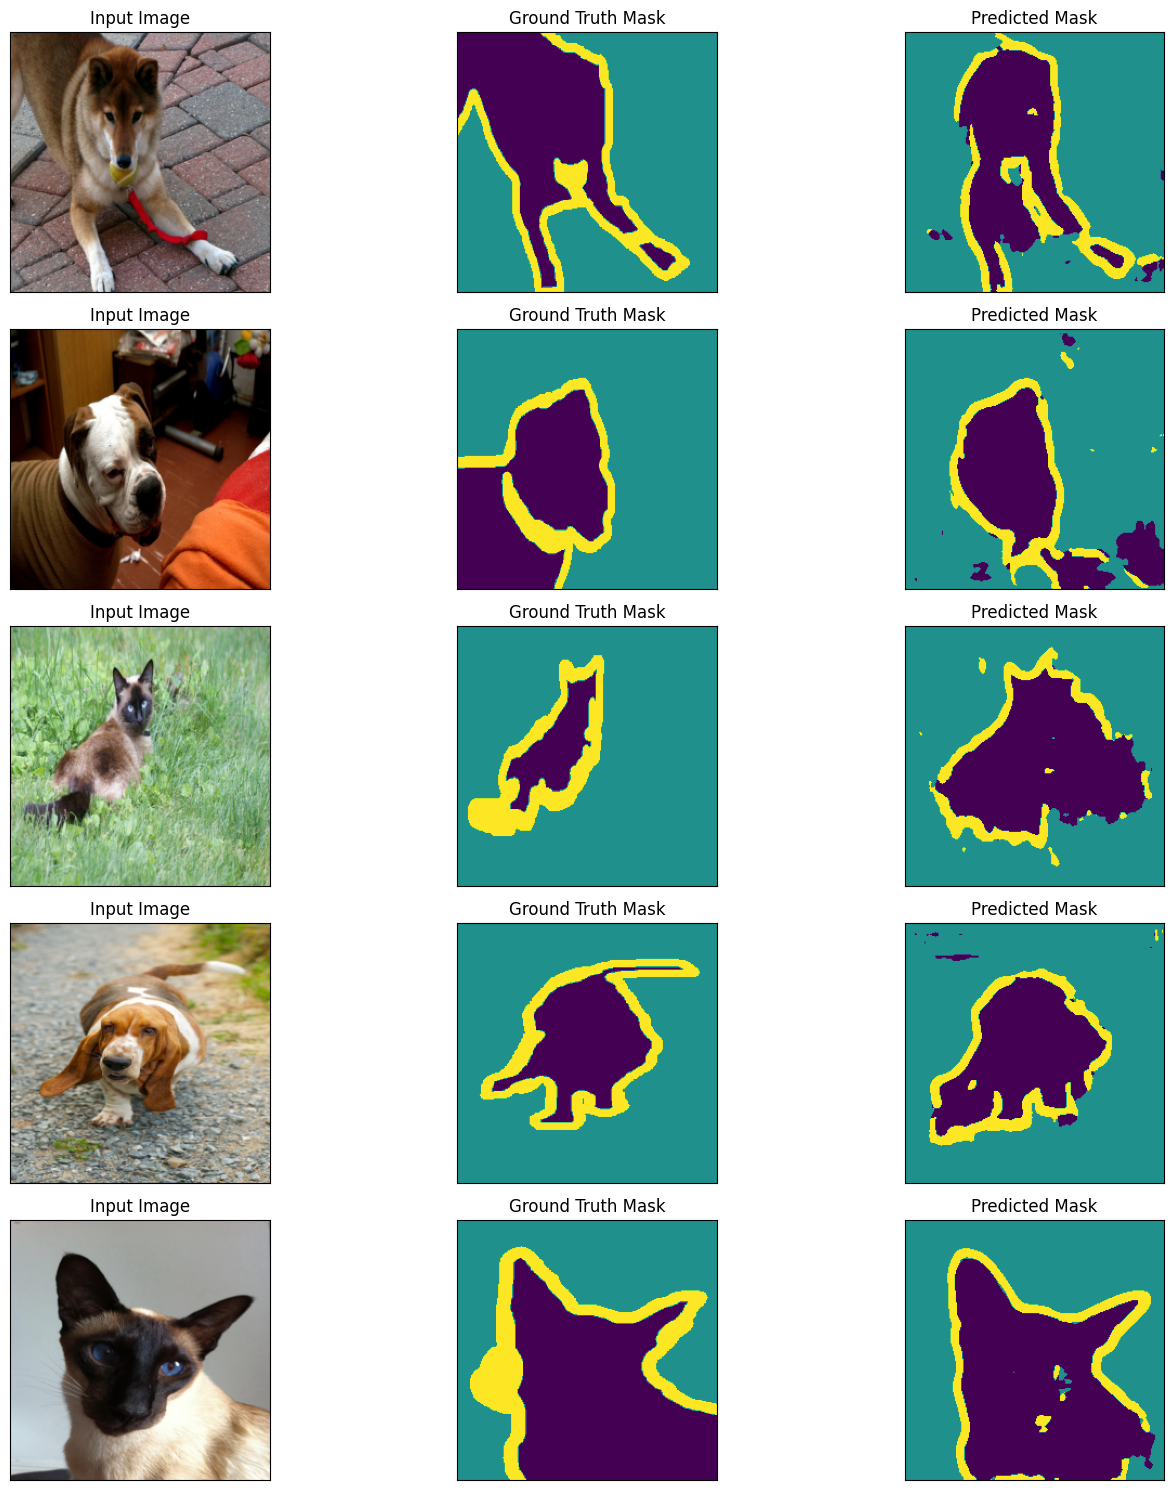

In [22]:
model.cpu().plot_random_test_samples(num_samples=5)